In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv("data/bank.csv")
df.sample(20)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
4486,37,blue-collar,married,primary,no,378,yes,no,unknown,9,may,514,1,-1,0,unknown,no
4417,33,unemployed,married,tertiary,no,302,yes,yes,cellular,16,apr,670,1,-1,0,unknown,no
1892,27,services,married,secondary,no,100,no,no,cellular,16,jul,57,2,-1,0,unknown,no
204,29,blue-collar,single,tertiary,no,455,no,no,telephone,21,apr,403,1,-1,0,unknown,yes
2852,39,management,married,tertiary,no,562,no,no,cellular,13,sep,303,2,-1,0,unknown,no
2137,59,blue-collar,married,primary,no,0,no,no,cellular,18,nov,167,2,-1,0,unknown,no
3975,34,services,married,secondary,no,-315,yes,no,unknown,8,may,56,2,-1,0,unknown,no
427,26,technician,married,tertiary,no,3825,yes,no,unknown,13,may,107,1,-1,0,unknown,no
2942,34,technician,married,tertiary,no,544,yes,yes,cellular,18,nov,58,2,-1,0,unknown,no
1463,40,technician,married,secondary,no,93,yes,no,unknown,13,may,134,2,-1,0,unknown,no


## Sobre el dataset
Este dataset contiene informacion sobre los clientes de los bancos y sus respuestas a las campanas de marketing. El conjunto de datos incuye caracteristicas **demograficas** y **financiera** de los clientes, como la edad, el trabajo, el estado civil, el nivel educativo y el saldo de sus cuentas. Ademas, incluye informacion sobre su respuesta a las camapans de marketing, como si suscribieron un deposito a largo plazo (yes/no) y el resultado de la campana de marketing (succes/failure).

El dataset tiene como objetivo ayudar a comprender  los factores que influyen en la decision de un cliente de ser suscribible a un deposito a plazo y la eficacia de las campanas de marketing.

Carateristicas clave

- Informacion demografica
- Informacion financiera
- Informacion de camapana de marketing
- Respuesta a campana de marketing

Variable objetivo

- y (suscripcion a deposito a plazo, yes/no)

Numero de instancias

- 5 (en la muestra proporcionada, pero el conjunto de datos real puede tener mas instancias)

Numero de columnas

- 16 (incluida la variable objetivo)

---

La integridad de los datos es buena

In [4]:
success = df[df["y"] == "yes"]

## KPI

### Tasa de conversion de contacto a cliente
Esta metrica indica que tan efectivo es el banco en convertir contactos en clientes.

---
Se calcula dividiendo al cancitidad de "yes" en la columna "y" con el total de columnas 

In [5]:
conversion_rate = success.shape[0] / df.shape[0] * 100
print(f"Conversion rate: {conversion_rate: .2f} %")

Conversion rate:  11.52 %


### Retencion de clientes

Se calcula dividiendo la cantidad de "Success" de la columna "poutcome" con la cantidad de "yes" en la columna "y"

In [6]:
pass_success = df[df["poutcome"] == "success"]
retention = pd.merge(pass_success, success, how="inner")

retention_rate = retention.shape[0] / pass_success.shape[0] * 100
print(f"Tasa de retencion: {retention_rate: .2f} %")

Tasa de retencion:  64.34 %


### Promedio de duracion de contacto
Esto puede ayudar a determinar cuanto tiempo se necesita para persuadir a un cliente potencial.

---

Se calcula dividiendo el promedio de la columna "duration" con el promedio de la columna "duration" para los que la columna "y" tambien es "yes"

In [7]:
success_duration = success["duration"].mean()
mean_duration = df["duration"].mean()

print(f"Tiempo de contacto exitoso promedio: {round(success_duration)}\nTiempo de contacto promedio: {round(mean_duration)}")

Tiempo de contacto exitoso promedio: 553
Tiempo de contacto promedio: 264


### Distribucion de efectividad de campana por mes

In [8]:
mounth_contacts = df.groupby(df["month"])["y"].count()
mounth_clients = success.groupby(df["month"])["y"].count()

mounth_convertion_rate = pd.DataFrame({"Contacts": mounth_contacts, "Clients": mounth_clients})
display(mounth_convertion_rate)

,Contacts,Clients
month,,
apr,293,56
aug,633,79
dec,20,9
feb,222,38
jan,148,16
jul,706,61
jun,531,55
mar,49,21
may,1398,93


### Promedio de contactos hasta la conversion
Mide la cantidad de contactos para finalmente el cliente se sucribiera.
La idea es mantener este numero lo mas bajo posible, indicando la eficiencia de los contactos.

---

In [9]:
mean_to_convertion = success["campaign"].mean()
print(f"Promedio de contactos hasta la conversion: {round(mean_to_convertion, 2)}")

Promedio de contactos hasta la conversion: 2.27


### Balance promedio segun profesion

In [10]:
job_balance = df.groupby("job")[["balance"]].mean()
job_balance

,balance
job,
admin.,1226.736402
blue-collar,1085.161734
entrepreneur,1645.125000
housemaid,2083.803571
management,1766.928793
retired,2319.191304
self-employed,1392.409836
services,1103.956835
student,1543.821429


#### Distribcion

#### Tendencia a suscribirse segun profesion

In [11]:
y_per_job = success.groupby("job").count()["y"]
y_per_job

job
admin.            58
blue-collar       69
entrepreneur      15
housemaid         14
management       131
retired           54
self-employed     20
services          38
student           19
technician        83
unemployed        13
unknown            7
Name: y, dtype: int64

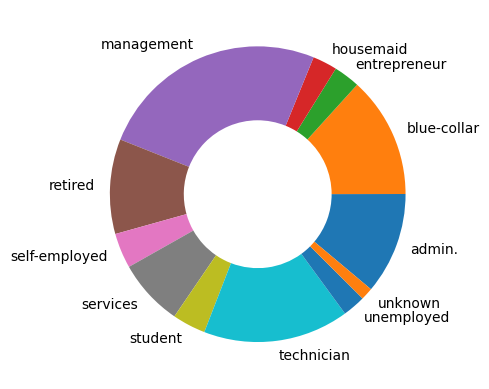

In [12]:
plt.figure()
plt.pie(y_per_job, labels=y_per_job.index, wedgeprops=dict(width=0.5), startangle=-40)
plt.show()


### Balance segun edad

In [13]:
age_balance = df.groupby("age")[["balance"]].mean()
age_balance

,balance
age,
19,393.500000
20,661.333333
21,1774.285714
22,1455.333333
23,2117.950000
...,...
81,1.000000
83,380.500000
84,639.000000


## Test zone


In [14]:
filas_seleccionadas = df.loc[(df['poutcome'] == 'success') & (df['y'] == 'yes')]
filas_seleccionadas

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
49,61,admin.,married,unknown,no,4629,yes,no,cellular,27,jan,181,1,92,1,success,yes
70,37,management,married,tertiary,no,0,no,no,cellular,16,jul,268,2,182,3,success,yes
110,21,student,single,secondary,no,2488,no,no,cellular,30,jun,258,6,169,3,success,yes
156,55,admin.,married,secondary,no,602,no,no,cellular,1,jun,324,3,90,2,success,yes
199,75,retired,married,secondary,no,3771,no,no,telephone,15,apr,185,1,181,2,success,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4224,69,retired,married,unknown,no,426,no,no,telephone,9,mar,225,1,90,1,success,yes
4229,62,self-employed,divorced,tertiary,no,6,yes,no,cellular,13,oct,216,1,183,4,success,yes
4232,38,technician,single,secondary,no,-242,yes,no,cellular,18,may,1173,3,278,6,success,yes
4433,40,management,married,tertiary,no,-17,yes,yes,cellular,11,may,474,1,256,1,success,yes


In [19]:
latex_table = df.to_latex(index=False)

ImportError: Missing optional dependency 'Jinja2'. DataFrame.style requires jinja2. Use pip or conda to install Jinja2.